<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

---

Let's practice PCA using a dataset from Kaggle! PCA is often used to simplify data, reduce noise, and find unmeasured "latent variables". So, it is important to spend the time to understand what's going on.

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether a speed dater likes reading, based on the dater's other likes.

---

### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desirable they are, and how they think others rate them on desirability.

Specifically, the columns in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   unique individual identifier
    wave                         |   meetup id
    like_sports                  |   enjoyment of participating in sports
    like_tvsports                |   enjoyment of watching sports on tv
    like_exercise                |   enjoyment of exercise
    like_food                    |   enjoyment of food
    like_museums                 |   enjoyment of museums
    like_art                     |   enjoyment of art
    like_hiking                  |   enjoyment of hiking
    like_gaming                  |   enjoyment of playing games
    like_clubbing                |   enjoyment of going clubbing/partying
    like_reading                 |   enjoyment of reading
    like_tv                      |   enjoyment of tv in general
    like_theater                 |   enjoyment of the theater (plays, musicals, etc.)
    like_movies                  |   enjoyment of movies
    like_concerts                |   enjoyment of concerts
    like_music                   |   enjoyment of music
    like_shopping                |   enjoyment of shopping
    like_yoga                    |   enjoyment of yoga
    subjective_attractiveness    |   how attractive they rate themselves
    subjective_sincerity         |   how sincere they rate themselves
    subjective_intelligence      |   how intelligent they rate themselves
    subjective_fun               |   how fun they rate themselves
    subjective_ambition          |   how ambitious they rate themselves
    objective_attractiveness     |   perceived rating others would give them on how attractive they are
    objective_sincerity          |   perceived rating others would give them on how sincere they are
    objective_intelligence       |   perceived rating others would give them on how intelligent they are
    objective_fun                |   perceived rating others would give them on how fun they are
    objective_ambition           |   perceived rating others would give them on how ambitious they are
    
There are 551 subjects total.

---

### 1. Load packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

---

### 2. Load and clean speed dating data

- Remove columns with over 200 missing values.
- Then, remove rows with missing values.
- Verify no rows contain NaNs.

In [3]:
sd = pd.read_csv('./speed_dating/speed_dating_v1.csv')

# A:

In [6]:
# A:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 29 columns):
subject_id                   551 non-null int64
wave                         551 non-null int64
like_sports                  544 non-null float64
like_tvsports                544 non-null float64
like_exercise                544 non-null float64
like_food                    544 non-null float64
like_museums                 544 non-null float64
like_art                     544 non-null float64
like_hiking                  544 non-null float64
like_gaming                  544 non-null float64
like_clubbing                544 non-null float64
like_reading                 544 non-null float64
like_tv                      544 non-null float64
like_theater                 544 non-null float64
like_movies                  544 non-null float64
like_concerts                544 non-null float64
like_music                   544 non-null float64
like_shopping                544 non-null float64

In [9]:
sd.drop(columns = ['objective_attractiveness' , 'objective_sincerity' , 'objective_intelligence' 
                   , 'objective_fun' , 'objective_ambition'] , axis = 1 , inplace = True)

In [27]:
sd.dropna(inplace = True)

In [28]:
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  0
like_tvsports                0
like_exercise                0
like_food                    0
like_museums                 0
like_art                     0
like_hiking                  0
like_gaming                  0
like_clubbing                0
like_reading                 0
like_tv                      0
like_theater                 0
like_movies                  0
like_concerts                0
like_music                   0
like_shopping                0
like_yoga                    0
subjective_attractiveness    0
subjective_sincerity         0
subjective_intelligence      0
subjective_fun               0
subjective_ambition          0
dtype: int64

---

### 3. EXAMPLE: Are the `subjective` columns correlated?

Here, we will understand how the `subjective` columns are correlated.

- Find the z-scores of each `subjective` column.
- Visualize correlation using pair plots.
- Visualize correlation using a heatmap.

#### 3.A. Find the z-scores of each column. This better allows the columns to be directly compared.

Hint: Make use of the standard scaler.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
subjective = sd[subjective_cols]

In [31]:
# A:
ss = StandardScaler()
subjective_ss = ss.fit_transform(subjective)

#### 3.B. Use a pair plot to visualize correlation

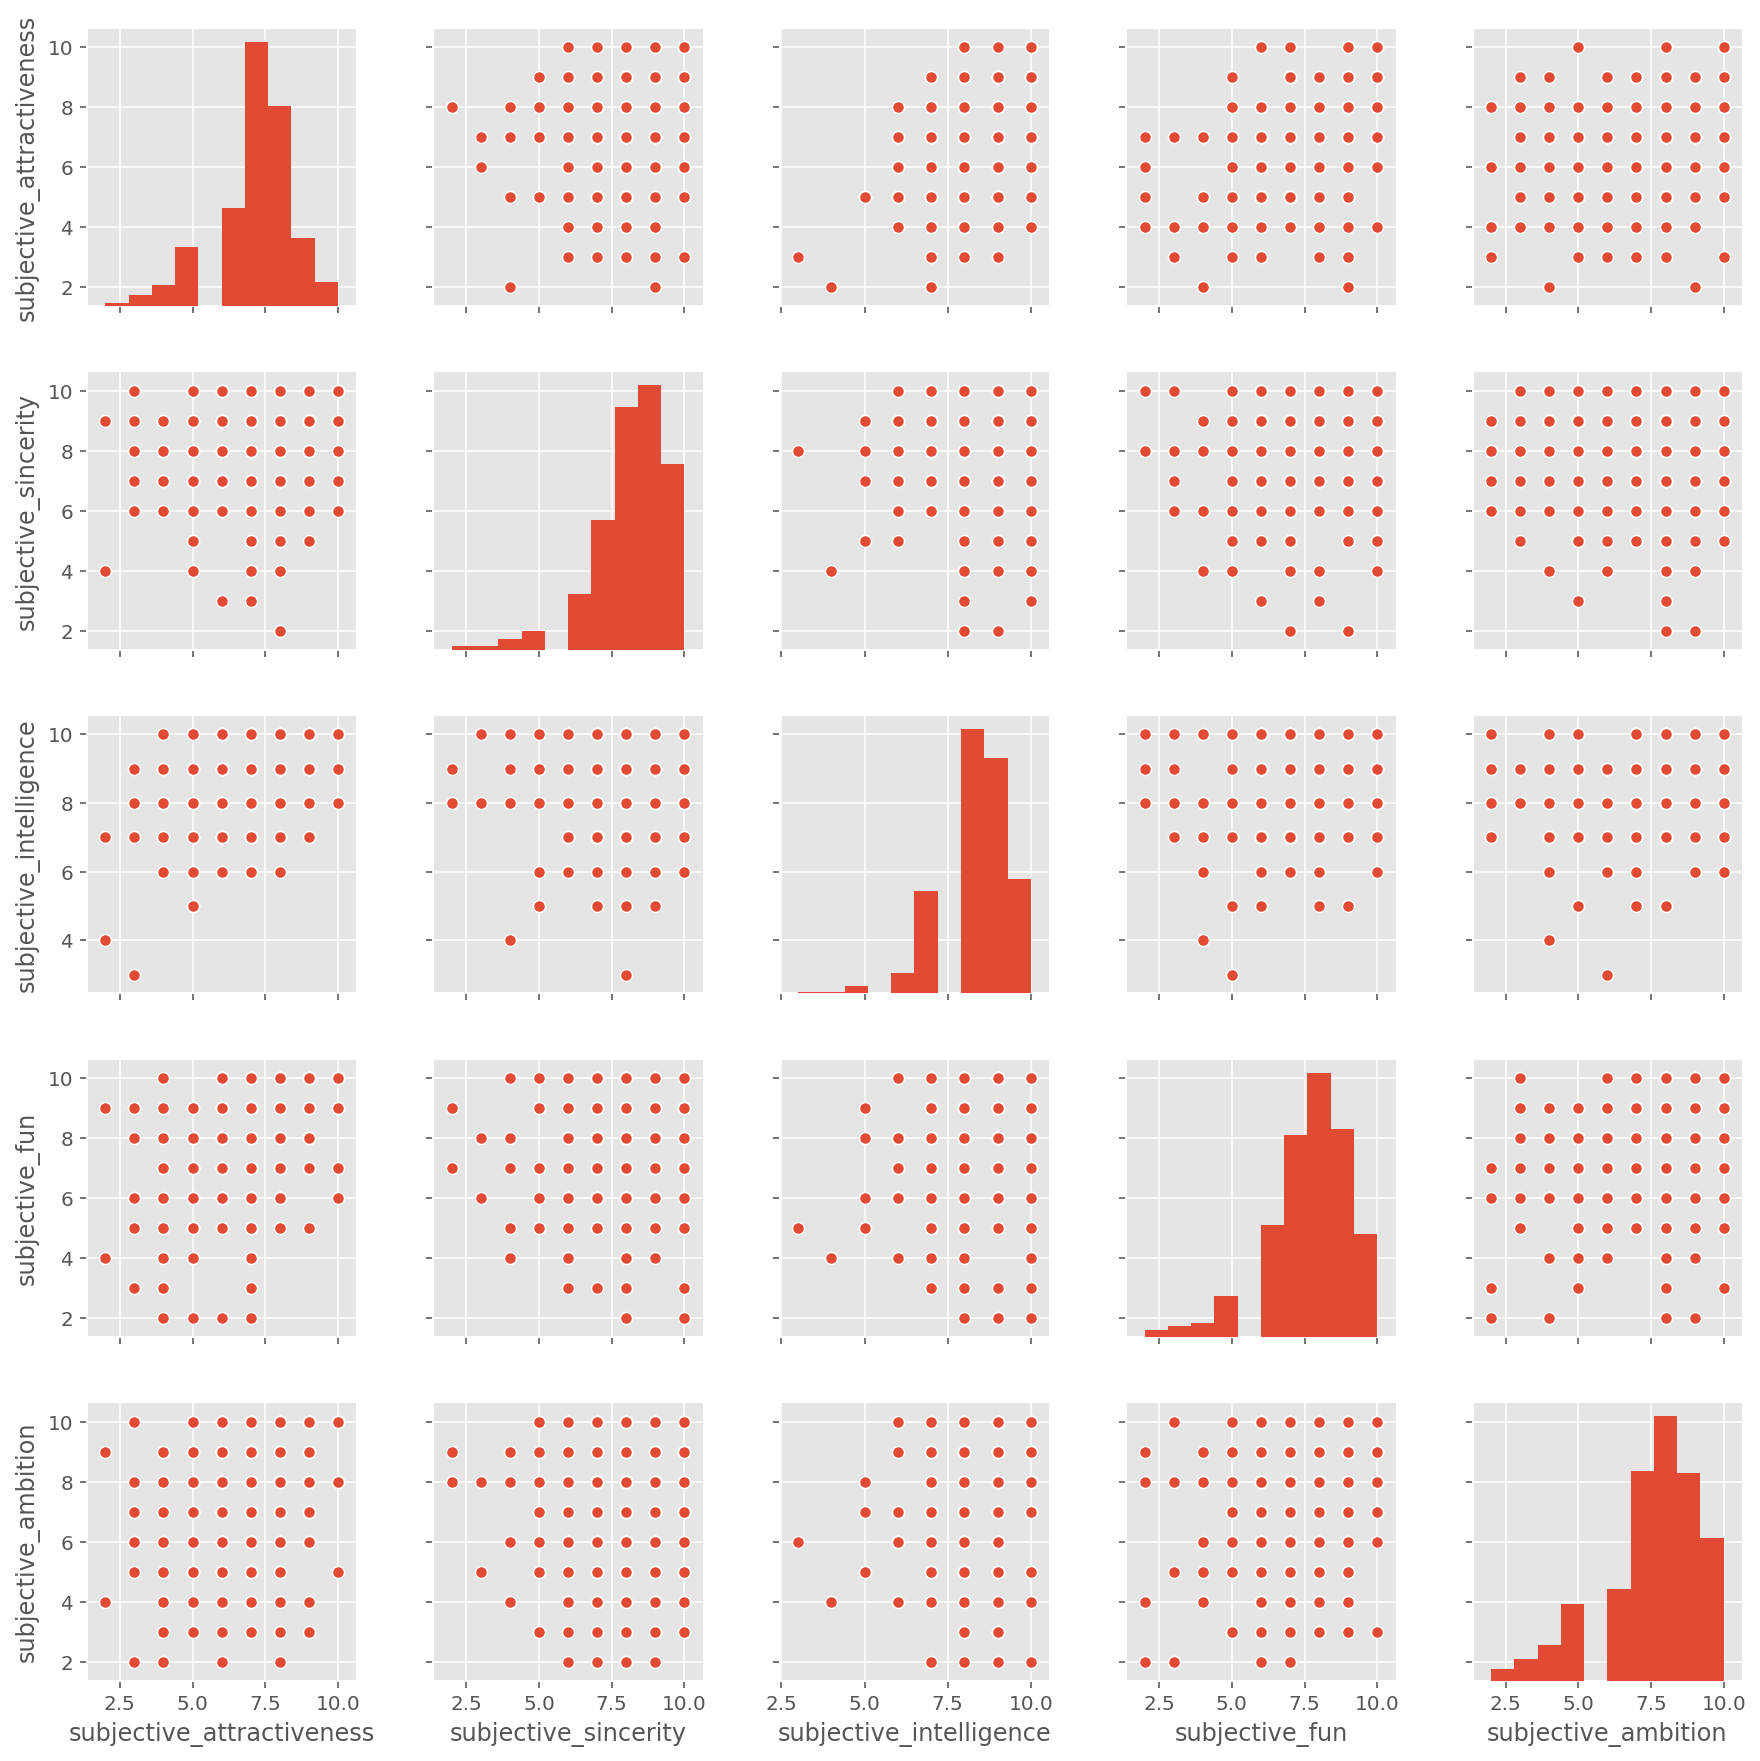

In [33]:
# A:
sns.pairplot(subjective);

#### 3.C. Use a heatmap to visualize correlation

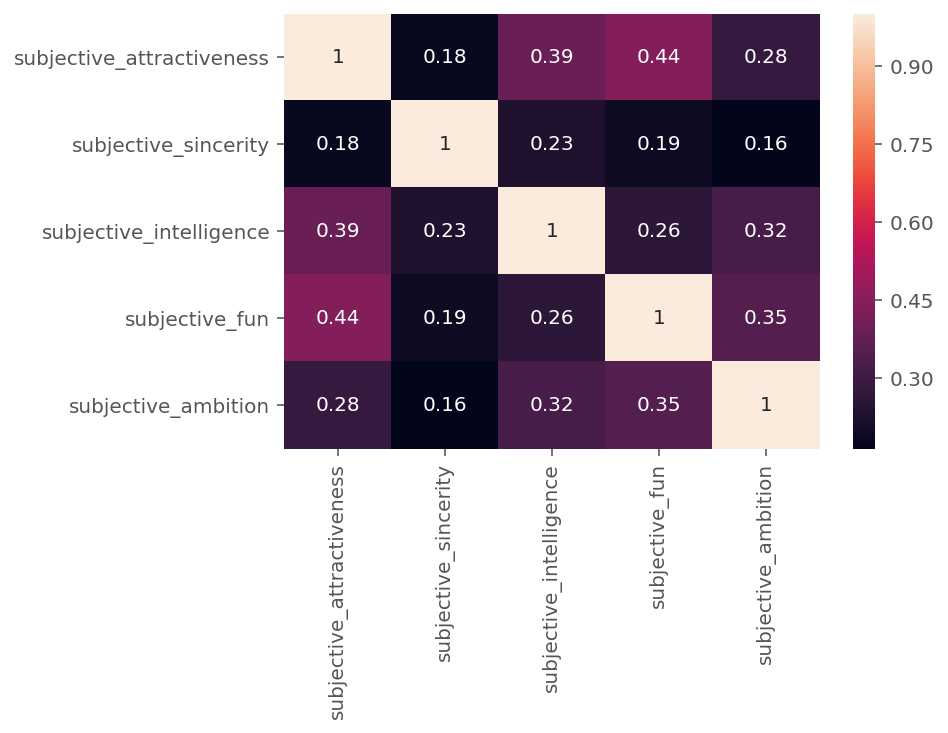

In [36]:
# A:
sns.heatmap(subjective.corr() , annot=True);

---

**Important: Did you ensure the results make intuitive sense?** If not, look at the results again. You should **always** interpret your results and ensure they "make sense" intutitively. If they are different than you expect, investigate why -- often your analysis or data is wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4. Visualize some preference columns

Next, we will understand how some preference ratings are correlated. You saw an example above -- now try it on the `preference_cols` below!

- Find the z-scores of each column in `preference_cols`.
- Visualize correlation using pair plots.
- Visualize correlation using a heatmap.
- Do these results make sense intuitively? 

In [37]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

#### 4.A. Find the z-scores of each column in preference_cols

In [38]:
# A:
p_ss = StandardScaler()
sd_like_ss = p_ss.fit_transform(sd_like)

#### 4.B. Visualize correlation using pair plots

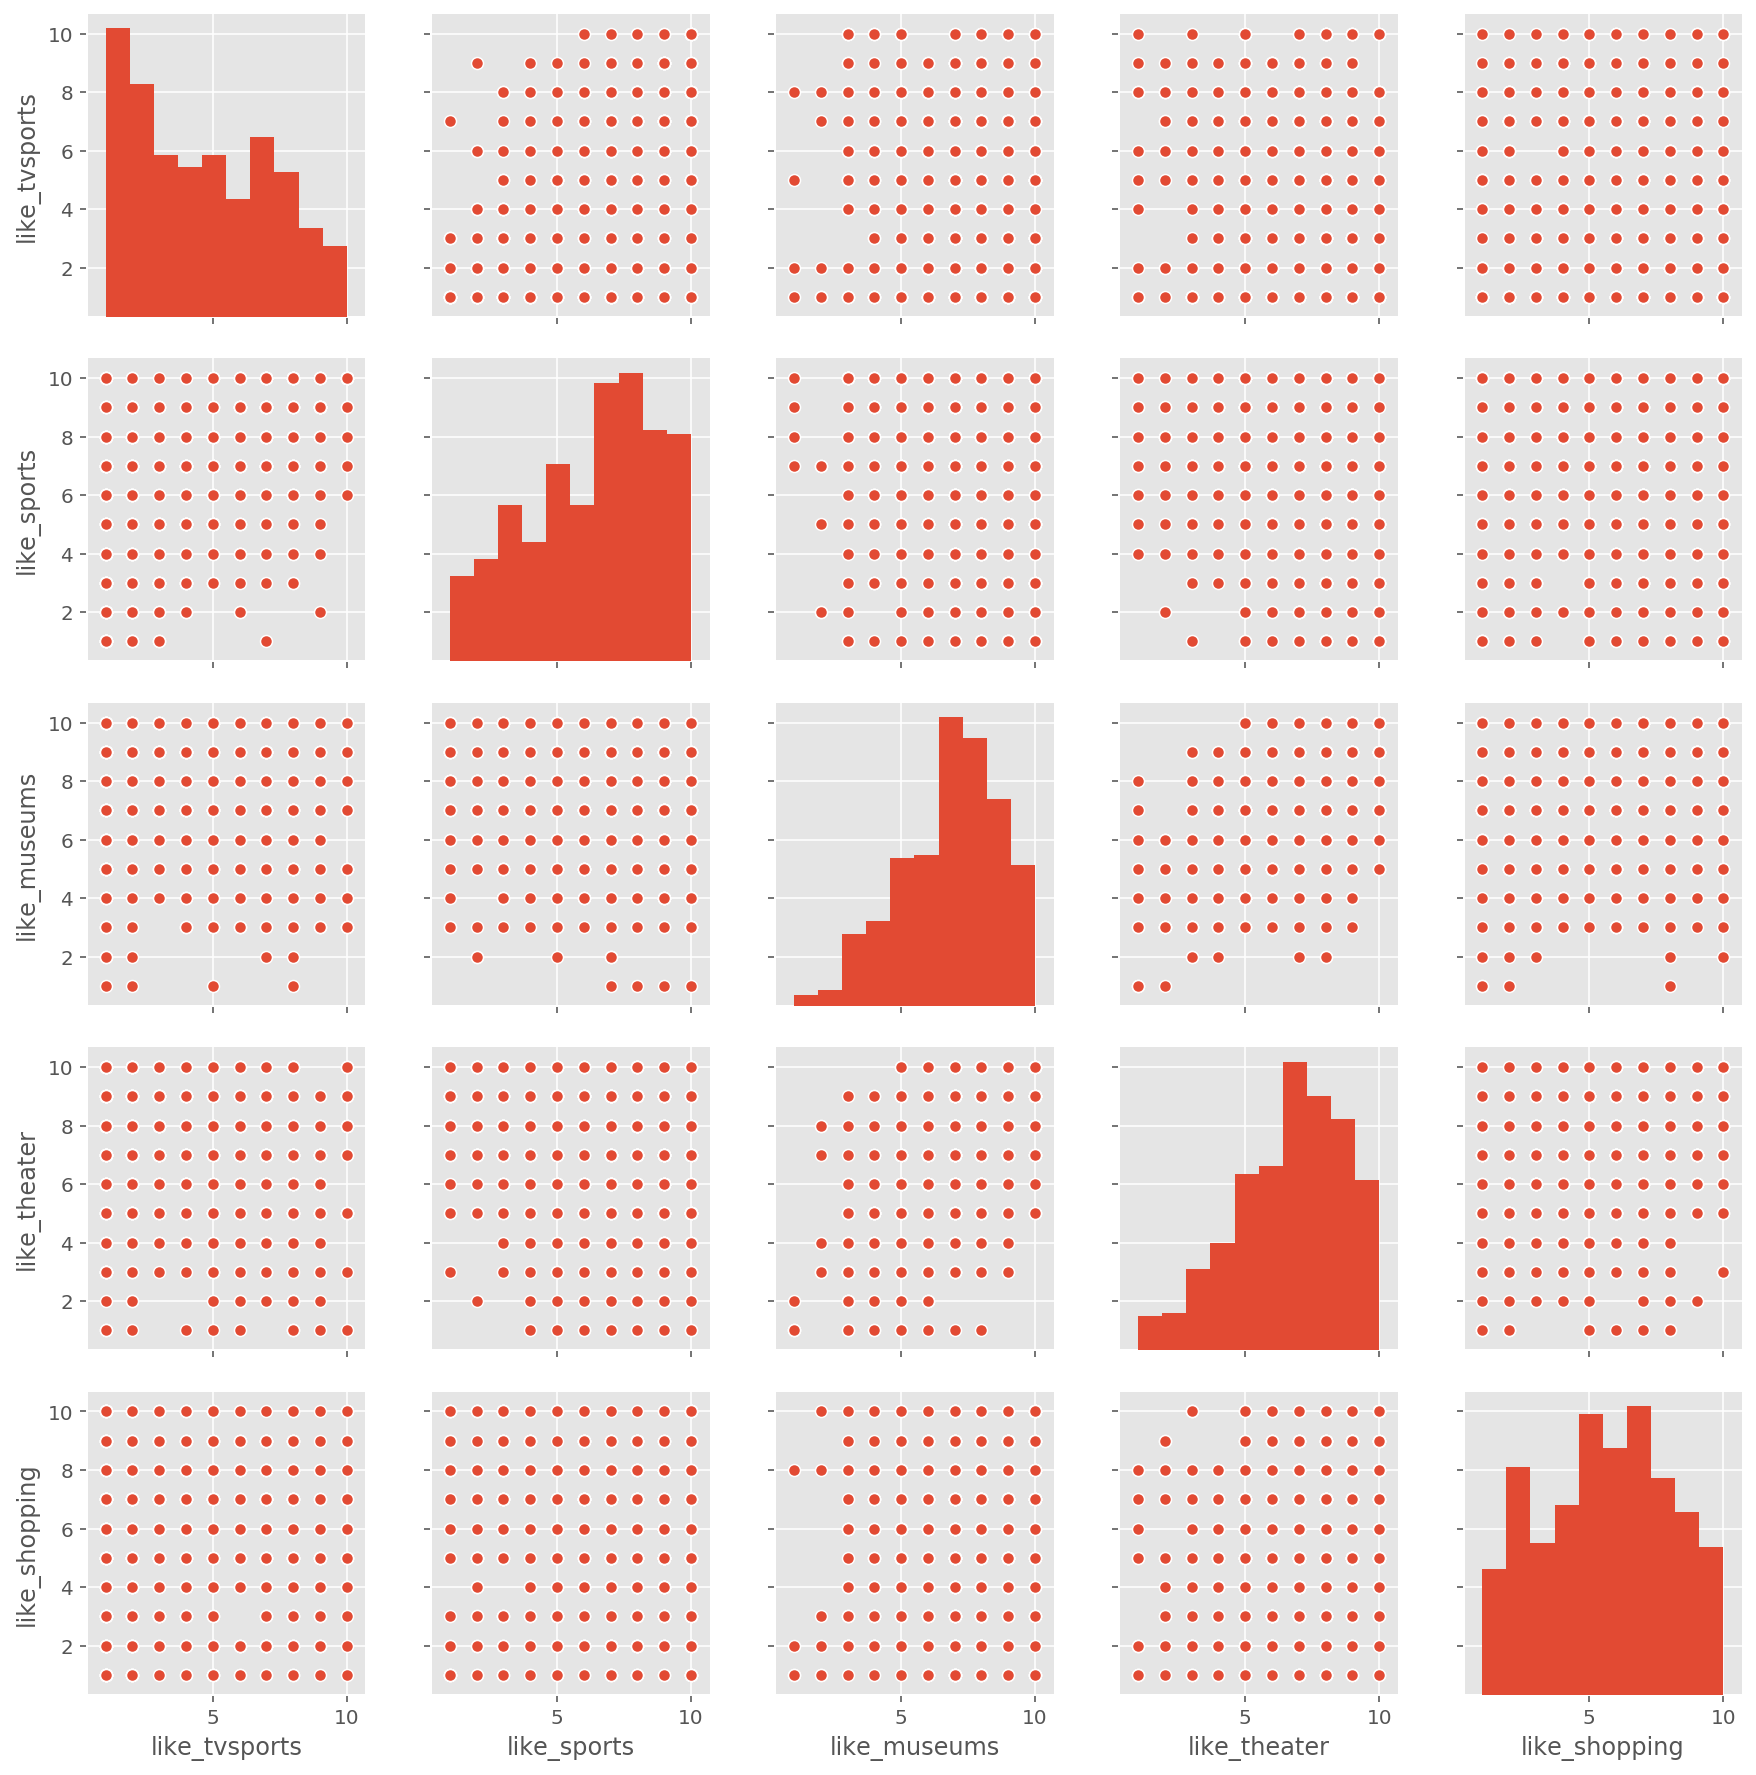

In [41]:
# A:
sns.pairplot(sd_like);

#### 4.C. Visualize correlation using a heatmap

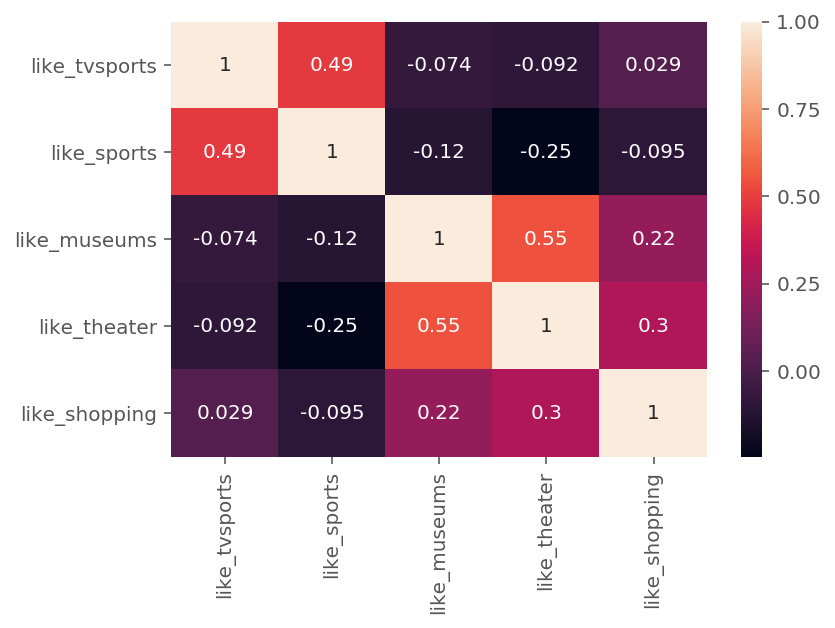

In [45]:
# A:
sns.heatmap(sd_like.corr(), annot=True);

---

### 5. EXAMPLE: Fit PCA on the subjective ratings


In [50]:
subjective_ss.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747


In [49]:
subjective_ss = pd.DataFrame(subjective_ss,columns=subjective.columns.values)

In [51]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective_ss)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
print("Number of principal components:\t", subjective_pca.n_components_)

Number of principal components:	 5


---

#### 5.A. Look at principal component weighting vectors (eigenvectors)

The principal components, or eigenvectors, can be thought of as weightings on the original variables to transform them into the new feature space.

In [53]:
# A:
subjective_pca.components_

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

---

#### 5.B. Look at the eigenvalues (explained variance) and explained variance ratio

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [57]:
print("Explained variance:\t\t", np.round(subjective_pca.explained_variance_, 5))
print("Explained variance ratio:\t", np.round(subjective_pca.explained_variance_ratio_, 5))

Explained variance:		 [2.16041 0.88925 0.73821 0.7223  0.49907]
Explained variance ratio:	 [0.43129 0.17752 0.14737 0.14419 0.09963]


---

#### 5.C. Transform the subjective data into principal component space

The transform function in the PCA will create your new component variable matrix.

In [61]:
# A:
print(subjective_pca.fit_transform(subjective_ss))
subjective_ss_p = subjective_pca.fit_transform(subjective_ss)

[[ 0.673942    0.03439955 -0.10382612 -0.35798348  0.57693667]
 [ 1.35044583  2.02341707 -2.13879048  1.07112465  1.64483811]
 [-0.94967947 -0.27146457 -0.03924025  0.28967741 -0.18508884]
 ...
 [ 1.27802939  0.74844718 -0.36801805 -0.31785638 -0.5792599 ]
 [ 2.37402987 -0.92246551  0.44869284  1.6557433  -1.43968236]
 [ 1.22960363  0.72837603 -0.34611708  0.16632973 -1.41541178]]


This transformed our 5-dimensional data into vectors along its 5 principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for $0.431 + 0.178 + 0.147 = 75.6\%$ of the variance.

In [60]:
# A:
print(np.round(subjective_pca.explained_variance_ratio_, 5)[:3])

[0.43129 0.17752 0.14737]


---

#### 5.D. PCA transformed features are not correlated

- Keep in mind that each column in the transformed data is no longer correlated!
- Compare this to the exploration above, where many columns were correlated.

In [64]:
# A:
print(pd.DataFrame(subjective_ss_p).corr())

              0             1             2             3             4
0  1.000000e+00 -2.835314e-16 -1.451130e-16  2.220252e-16 -2.834084e-16
1 -2.835314e-16  1.000000e+00 -1.153718e-16  1.619903e-16 -1.971515e-17
2 -1.451130e-16 -1.153718e-16  1.000000e+00  3.360161e-17 -3.380980e-19
3  2.220252e-16  1.619903e-16  3.360161e-17  1.000000e+00 -3.212934e-16
4 -2.834084e-16 -1.971515e-17 -3.380980e-19 -3.212934e-16  1.000000e+00


In [66]:
print(subjective.corr())

                           subjective_attractiveness  subjective_sincerity  \
subjective_attractiveness                   1.000000              0.182410   
subjective_sincerity                        0.182410              1.000000   
subjective_intelligence                     0.390144              0.233328   
subjective_fun                              0.444195              0.189761   
subjective_ambition                         0.283712              0.163047   

                           subjective_intelligence  subjective_fun  \
subjective_attractiveness                 0.390144        0.444195   
subjective_sincerity                      0.233328        0.189761   
subjective_intelligence                   1.000000        0.263585   
subjective_fun                            0.263585        1.000000   
subjective_ambition                       0.323155        0.346745   

                           subjective_ambition  
subjective_attractiveness             0.283712  
subjective_s

---

### 6.  OPTIONAL: How was the data transformed?

To demonstrate how the the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component PC1 manually.

#### 6.A. Pull out the eigenvector for PC1

In [75]:
# you got all the eigenvectors in 5.A
# A:
pc1 = pd.DataFrame({'PC1':subjective_ss_p[:, 0]})
pc1.head()

,PC1
0,0.673942
1,1.350446
2,-0.949679
3,0.180279
4,1.310959


#### 6.B. Create a dataframe showing the original values for the subjective variables for person 1

In [77]:
# A:
pd.DataFrame(subjective.iloc[1])

,1
subjective_attractiveness,7.0
subjective_sincerity,5.0
subjective_intelligence,8.0
subjective_fun,10.0
subjective_ambition,3.0


#### 6.C. Add the eigenvector for PC1: the weights to multiply each original variable by

Recall that each component is a linear combination of the original variables multiplied by a "weight" defined in the eigenvector of that component.

In [21]:
# A:

#### 6.D. Multiply the original variable values by the eigenvector values

These are the "pieces" of principal component 1 that will be added together to make the new value for that person.

In [22]:
# A:

#### 6.E. Sum the original values multiplied by the eigenvector weights to get person 1's value for PC1

In [23]:
# A:

---

### 7. Fit PCA on the preference data

Now that you've seen how it's done, try it yourself!
Use sklearn for the PCA transformation.

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns
- Transform the original `sd_like` columns into the principal component space
- Verify these columns are uncorrelated

In [78]:
sd_like.columns

Index(['like_tvsports', 'like_sports', 'like_museums', 'like_theater',
       'like_shopping'],
      dtype='object')

#### 7.A. Find PCA eigenvalues and eigenvectors for the five `sd_like` columns

In [82]:
# A:
# fit pca
# use .components_ and .explained_variance_ratio_
pca = PCA(n_components=5)
pca.fit(sd_like)
print(pca.components_ )
print('--------')
print(pca.explained_variance_ratio_)

[[ 0.62736939  0.62167038 -0.2330427  -0.33685671 -0.22836866]
 [-0.44611128 -0.17137686 -0.36194075 -0.44630599 -0.66439789]
 [-0.11063564 -0.08530062 -0.50180641 -0.49012362  0.69889393]
 [ 0.62338705 -0.74294543 -0.20709265  0.01934922 -0.12711771]
 [ 0.08087475 -0.15783472  0.72110537 -0.66838834  0.04256242]]
--------
[0.38279101 0.27935293 0.15599946 0.11789193 0.06396467]


#### 7.B. Transform the original `sd_like` columns into the principal component space

In [85]:
# A:
# use .transform
sd_like_pc = pca.transform(sd_like)

#### 7.C. Verify these columns are uncorrelated

In [86]:
# A:
pd.DataFrame(sd_like_pc).corr()

,0,1,2,3,4
0,1.000000e+00,-2.393613e-16,7.509790e-17,-2.949671e-16,-1.487230e-16
1,-2.393613e-16,1.000000e+00,-2.844612e-16,-4.777713e-17,-3.352543e-16
2,7.509790e-17,-2.844612e-16,1.000000e+00,-9.443084e-17,-4.839758e-16
3,-2.949671e-16,-4.777713e-17,-9.443084e-17,1.000000e+00,-1.090333e-16
4,-1.487230e-16,-3.352543e-16,-4.839758e-16,-1.090333e-16,1.000000e+00


---

### 8. Use PCA for dimensionality reduction

Using linear regression, let's predict whether a user likes reading!

**The key question: ** Can we get the same prediction accuracy using only the first three principal components as features, versus using all five original values as features?

- Do a train test split.
- Do cross validation on the training set and get the mean score.
- Evaluate on the test set.

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

reading = sd['like_reading']
X = sd.drop(columns = 'like_reading' , axis = 1)

#### 8.A. Linear regression cross-validated on original variables (`sd_like`)

- What is the mean cross val score?

In [92]:
X.head()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,like_movies,like_concerts,like_music,like_shopping,like_yoga,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,8.0,7.0,8.0,3.0,1.0,7.0,5.0,8.0,10.0,3.0
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,7.0,7.0,5.0,8.0,7.0,8.0,9.0,9.0,8.0,8.0
3,4,1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,...,7.0,8.0,7.0,1.0,8.0,7.0,8.0,7.0,9.0,8.0
4,5,1,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,...,6.0,3.0,7.0,8.0,3.0,6.0,3.0,10.0,6.0,8.0


In [93]:
X.shape[0]

542

In [91]:
# Do a train test split.
X_train , X_test  , y_train , y_test = train_test_split(X ,reading  , test_size = 0.2)

In [94]:
# Do cross validation on the training set and get the mean score.
lr = LinearRegression()
cross_val_score(lr , X_train , y_train, cv = 3).mean()

0.12119306300689685

In [96]:
# Evaluate on the test set.
lr.fit(X_train , y_train)
lr.score(X_test , y_test)

-0.04028334568777603

#### 8.B. Linear regression on first principal component

- What is the mean cross val score?

In [97]:
len(X.columns)

23

In [98]:
# A:
model = LinearRegression()
pca = PCA(n_components=23)
pca.fit(X)
model.fit(pca.transform(X)[:,:1],reading)
print(model.score(pca.fit_transform(X)[:,:1],reading))
print(cross_val_score(model,pca.fit_transform(X)[:,:1],reading,cv=5).mean())

0.0004494562274818259
-0.06688542403187374


#### 8.C. Linear regression on first 3 principal components

- What is the mean cross val score?

In [99]:
# A:
model = LinearRegression()
pca = PCA(n_components=23)
pca.fit(X)
model.fit(pca.transform(X)[:,:3],reading)
print(model.score(pca.fit_transform(X)[:,:3],reading))
print(cross_val_score(model,pca.fit_transform(X)[:,:3],reading,cv=5).mean())

0.09058196646141747
0.013696760944762664


#### 8.D. Linear regression on first 5 principal components

- What is the mean cross val score?

In [100]:
# A:
model = LinearRegression()
pca = PCA(n_components=23)
pca.fit(X)
model.fit(pca.transform(X)[:,:5],reading)
print(model.score(pca.fit_transform(X)[:,:5],reading))
print(cross_val_score(model,pca.fit_transform(X)[:,:5],reading,cv=5).mean())

0.10154485251340206
0.020718603999065843


---

**Check yourself**. Compare the different scores!

In [33]:
# A: